In [118]:
#Load packages and function

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd

def animate_point_motion_from_data(data, background_image_path=None):
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(10, 10))  # Adjust window size to fit background image
    
    # Set coordinate range
    ax.set_xlim(0, 2160)
    ax.set_ylim(0, 2160)
    ax.axhline(0, color='black', linewidth=0.5, zorder=1)
    ax.axvline(0, color='black', linewidth=0.5, zorder=1)
    
    # Load background image (optional)
    if background_image_path:
        background_image = plt.imread(background_image_path)
        ax.imshow(background_image, 
                  extent=[0, 2160, 0, 2160],
                  aspect='auto', zorder=0)
    
    # Initialize point and trajectory line
    point, = ax.plot([], [], 'ro', markersize=8, zorder=2)  # Plot the moving point
    path, = ax.plot([], [], 'b-', zorder=2)  # Plot the trajectory line

    def update(frame):
        x = data.x.iloc[frame] +240  # Get x coordinate of current frame
        y = data.y.iloc[frame] +240  # Get y coordinate of current frame
        
        # Update point position
        point.set_data([x], [y])
        
        # Update trajectory
        path.set_data(np.append(path.get_xdata(), x), np.append(path.get_ydata(), y))
        
        return point, path

    plt.rcParams['animation.embed_limit'] = 1000.0  # Set animation size limit in MB
    
    # Create animation
    #ani = animation.FuncAnimation(fig, update, frames=len(data), interval=16, blit=True)
    ani = animation.FuncAnimation(fig, update, frames=len(data), interval=1, blit=True)

    return ani


In [119]:
#Load the data
df = pd.read_csv("/Users/armourandrew/Desktop/filtered_8234.csv")

In [120]:
#Apply filter
data = df[(df["ID"]=="20230619-0008")&(df["track"]==7)]

In [121]:
#Transform the data
data['x'] = data['x'].apply(ast.literal_eval)
data['y'] = data['y'].apply(ast.literal_eval)

/var/folders/zx/8zn14kyn6xx7ydfrd9_zlts80000gn/T/ipykernel_4217/4014665024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x'] = data['x'].apply(ast.literal_eval)
/var/folders/zx/8zn14kyn6xx7ydfrd9_zlts80000gn/T/ipykernel_4217/4014665024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'] = data['y'].apply(ast.literal_eval)


Processing: 20230619-0008_4.html
Saved: 20230619-0008_4.html
Processing: 20230619-0008_5.html


KeyboardInterrupt: 

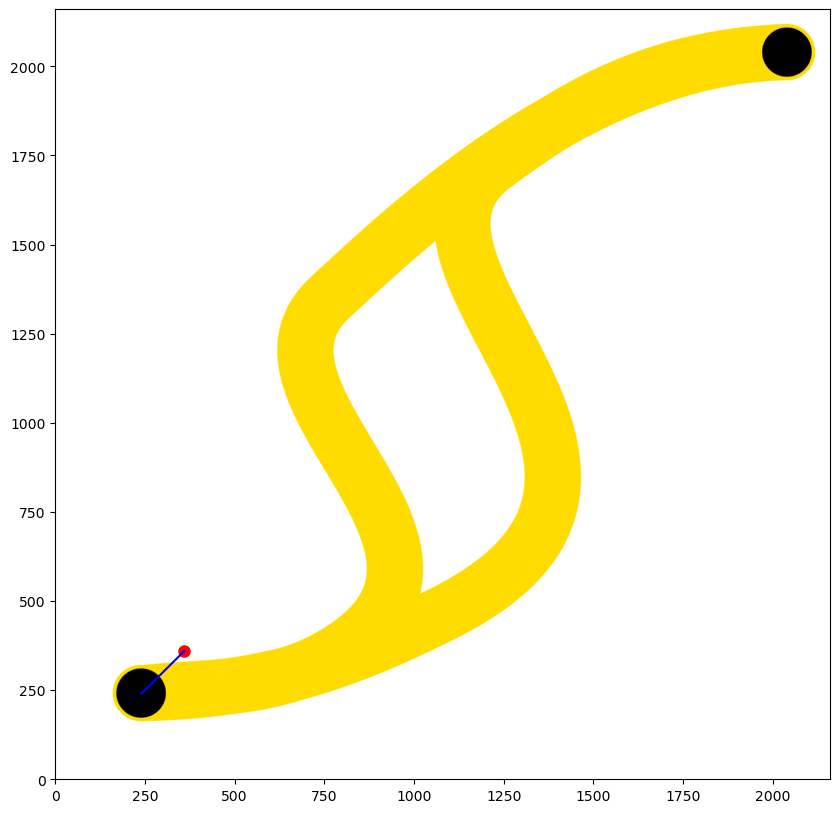

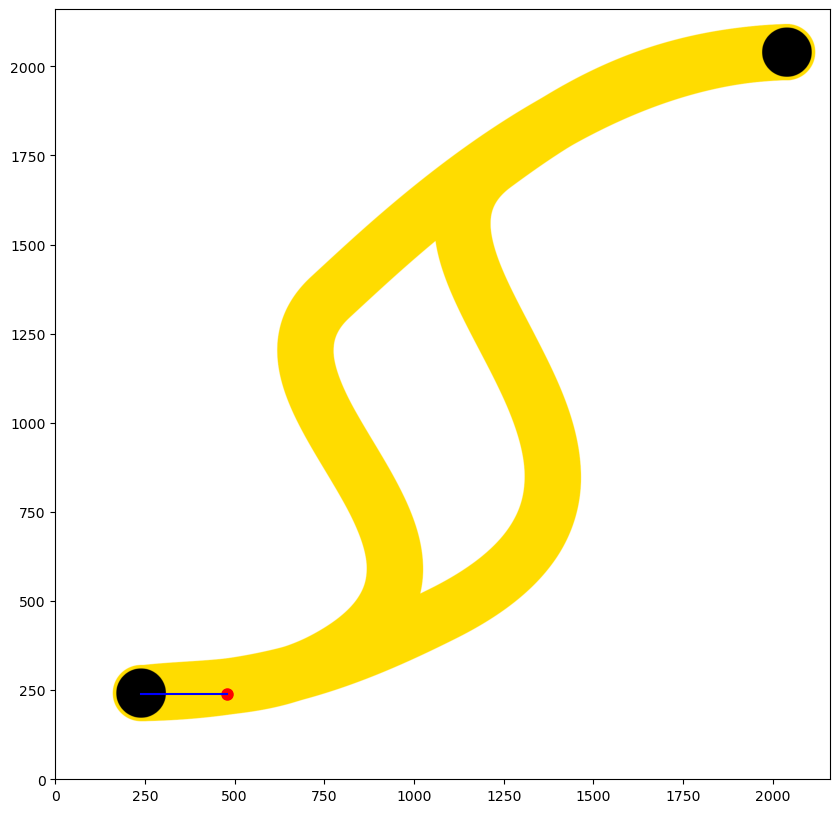

In [122]:
#Generation of animation

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    # Create a DataFrame for the trajectory data of the current row
    trajectory_data = pd.DataFrame({
        'x': row['x'],
        'y': row['y']
    })
    
    # Construct the output file name in the format "ID_record.html"
    output_filename = f"{row['ID']}_{row['record']}.html"
    
    print(f"Processing: {output_filename}")
    
    # Generate the animation
    try:
        ani = animate_point_motion_from_data(trajectory_data, background_image_path="/Users/armourandrew/Desktop/track/%s.png" % row['track'])
        
        # Save the animation as HTML
        html_output = ani.to_jshtml()
        with open(output_filename, "w") as f:
            f.write(html_output)
        
        print(f"Saved: {output_filename}")
        
    except Exception as e:
        print(f"Error processing {output_filename}: {str(e)}")
        # Clear the current figure to avoid affecting the next animation
        plt.clf()